# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="
clouds = []
country = []
date = []
humidity = []
lat = []
lng = [] 
maxTemp = []
windSpeed = []
cities2 = []
count = 0

In [5]:
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    full_url = query_url + city
    weather = requests.get(full_url)
    jsonWeather = weather.json()
    try:
        clouds.append(jsonWeather['clouds']['all'])
        country.append(jsonWeather['sys']['country'])
        date.append(time.time())
        humidity.append(jsonWeather['main']['humidity'])
        lat.append(jsonWeather['coord']['lat'])
        lng.append(jsonWeather['coord']['lon'])
        maxTemp.append(jsonWeather['main']['temp_max'])
        windSpeed.append(jsonWeather['wind']['speed'])
        cities2.append(city)
        count += 1
        print(f"Processing Record {count} | {city}")
    except KeyError:
        print("City not found. How embarasing, skipping...")
        
print("End of Data Retrieval")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | provideniya
Processing Record 2 | jamestown
Processing Record 3 | sorland
Processing Record 4 | kapaa
Processing Record 5 | victoria
Processing Record 6 | albany
Processing Record 7 | katsuura
Processing Record 8 | ahipara
City not found. How embarasing, skipping...
Processing Record 9 | hofn
Processing Record 10 | yulara
Processing Record 11 | villamontes
Processing Record 12 | bredasdorp
Processing Record 13 | cape town
Processing Record 14 | wangaratta
Processing Record 15 | yellowknife
Processing Record 16 | nokha
Processing Record 17 | ponta do sol
Processing Record 18 | launceston
City not found. How embarasing, skipping...
Processing Record 19 | hilo
Processing Record 20 | cherskiy
Processing Record 21 | saint-philippe
Processing Record 22 | calama
Processing Record 23 | rikitea
Processing Record 24 | pauini
Processing Record 25 | yenagoa
Processing Record 26 | san rafael
Processing Record 27 | dikson
P

Processing Record 212 | kastamonu
Processing Record 213 | clyde river
Processing Record 214 | dicabisagan
Processing Record 215 | anadyr
Processing Record 216 | saint-alexandre
City not found. How embarasing, skipping...
Processing Record 217 | milkovo
Processing Record 218 | torbay
Processing Record 219 | dondo
Processing Record 220 | marzuq
Processing Record 221 | namatanai
Processing Record 222 | nalut
Processing Record 223 | cartagena
Processing Record 224 | dutse
Processing Record 225 | port-gentil
Processing Record 226 | igarka
Processing Record 227 | vestmannaeyjar
Processing Record 228 | asosa
Processing Record 229 | senador guiomard
Processing Record 230 | sterling
Processing Record 231 | shimoda
Processing Record 232 | matara
Processing Record 233 | north bend
Processing Record 234 | nome
Processing Record 235 | carroll
City not found. How embarasing, skipping...
Processing Record 236 | sambava
Processing Record 237 | honiara
Processing Record 238 | praia
Processing Record 23

Processing Record 425 | bud
Processing Record 426 | moroto
Processing Record 427 | ustka
Processing Record 428 | teguldet
Processing Record 429 | banda aceh
Processing Record 430 | gamba
Processing Record 431 | amahai
Processing Record 432 | banjar
Processing Record 433 | paka
Processing Record 434 | hualmay
Processing Record 435 | rameswaram
City not found. How embarasing, skipping...
Processing Record 436 | kalakamati
Processing Record 437 | atambua
Processing Record 438 | ouadda
Processing Record 439 | olinda
Processing Record 440 | tura
Processing Record 441 | san lawrenz
Processing Record 442 | bechem
Processing Record 443 | kayerkan
Processing Record 444 | elk city
Processing Record 445 | kedrovyy
Processing Record 446 | kerouane
Processing Record 447 | udachnyy
Processing Record 448 | bukama
Processing Record 449 | seoul
Processing Record 450 | nazira
Processing Record 451 | smoky lake
Processing Record 452 | ningxiang
Processing Record 453 | kholodnyy
City not found. How embara

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_dict = {
    "City": cities2,
    "Cloudiness": clouds,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxTemp,
    "Wind Speed": windSpeed
}
cities_df = pd.DataFrame(cities_dict)
cities_df.to_csv(output_data_file)
cities_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,provideniya,0,RU,1.570907e+09,86,64.42,-173.23,25.23,4.13
1,jamestown,99,AU,1.570907e+09,23,-33.21,138.60,62.49,20.37
2,sorland,1,NO,1.570907e+09,57,67.67,12.69,41.79,9.07
3,kapaa,40,US,1.570907e+09,74,22.08,-159.32,80.60,17.22
4,victoria,90,BN,1.570907e+09,88,5.28,115.24,78.80,2.56


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

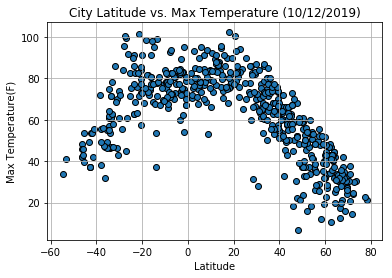

In [7]:
plt.scatter(cities_df['Lat'], cities_df['Max Temp'], marker='o', edgecolor = 'black')
dateList = time.localtime(time.time())
ASdate = str(dateList[1]) + '/' + str(dateList[2]) + '/' + str(dateList[0])
plt.title(f'City Latitude vs. Max Temperature ({ASdate})') 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()
plt.savefig("LatVSTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

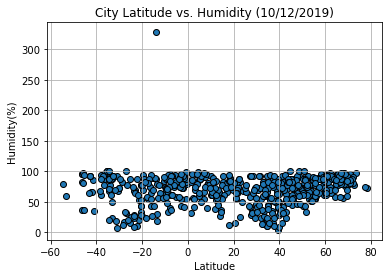

In [8]:
plt.scatter(cities_df['Lat'], cities_df['Humidity'], marker='o', edgecolor = 'black')
plt.title(f'City Latitude vs. Humidity ({ASdate})') 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.savefig("LatVSHumid.png")
plt.show()

#### Latitude vs. Cloudiness Plot

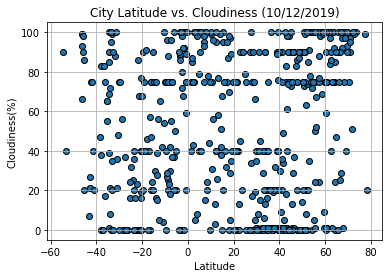

In [9]:
plt.scatter(cities_df['Lat'], cities_df['Cloudiness'], marker='o', edgecolor = 'black')
plt.title(f'City Latitude vs. Cloudiness ({ASdate})') 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig("LatVSClouds.png")
plt.show()

#### Latitude vs. Wind Speed Plot

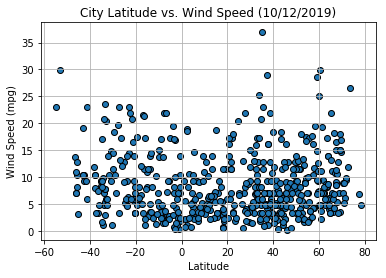

In [10]:
plt.scatter(cities_df['Lat'], cities_df['Wind Speed'], marker='o', edgecolor = 'black')
plt.title(f'City Latitude vs. Wind Speed ({ASdate})') 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.grid()
plt.savefig("LatVSWSpeed.png")
plt.show()